In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [2]:
ukb_phen = pd.read_csv('../data/ukb_filtered_phenotypes.csv', index_col=0)
ukb_phen.head()

,2178-2.0,20023-2.0,4282-2.0,20016-2.0,6348-2.0,6350-2.0,6349-2.0,6351-2.0,6373-2.0,21004-2.0,23323-2.0,23324-2.0,20018-2.0,46-2.0,47-2.0
eid20904,,,,,,,,,,,,,,,
4538295,4.0,452.0,-1.0,4.0,182.0,449.0,0.0,1.0,7.0,8.0,24.0,24.0,1.0,39.0,44.0
2673033,2.0,604.0,8.0,4.0,178.0,418.0,0.0,0.0,7.0,11.0,26.0,26.0,1.0,40.0,42.0
1927180,2.0,577.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,32.0
4849271,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3226827,2.0,783.0,6.0,5.0,327.0,370.0,0.0,1.0,8.0,10.0,25.0,24.0,1.0,22.0,22.0


In [3]:
reported_AD_at_scan = [1383275, 2114880, 5821545, 1471348, 4527724]
reported_PD_at_scan = [1532621, 1617724, 1733101, 1901760, 1925689, 2013553, 2106457,
       2275507, 2292257, 2327800, 2357487, 2491460, 2631110, 2718684,
       2869750, 2917693, 3033122, 3047828, 3157620, 3204408, 3273184,
       3318498, 3542965, 3549084, 3575461, 3696225, 4061219, 4170625,
       4265867, 4527724, 4654041, 5317140, 5723283, 5765412, 5892488,
       2718684]

In [4]:
latest_output_df = pd.read_csv('../results/latest_output.csv', index_col=0)
disease_info_df = pd.read_csv('../data/ukb_diagnosis.csv', index_col=0)
joined_df = latest_output_df.join(disease_info_df, how='inner')

only_controls = latest_output_df[~latest_output_df.index.isin(joined_df.index)]

In [8]:
people_ad_later = joined_df[joined_df.diag_icd10 == 'AD']
people_ad_later = people_ad_later[~people_ad_later.index.isin(reported_AD_at_scan)]
people_ad_later = people_ad_later[~people_ad_later.index.isin(reported_PD_at_scan)]
people_ad_later

,mean,std,diag_icd10
1174643,0.843564,0.169936,AD
1502601,0.256988,0.205914,AD
1878467,0.553134,0.269960,AD
1971804,0.091417,0.122653,AD
2511898,0.090066,0.099041,AD
4199832,0.933827,0.121932,AD
4652621,0.795463,0.230180,AD
4747402,0.925043,0.082295,AD
5276835,0.555365,0.245567,AD
5382091,0.800952,0.203898,AD


In [9]:
certain_controls = only_controls[(only_controls['mean'] < 0.5) & (only_controls['std'] < 0.1)]
certain_controls.shape

(9635, 2)

In [10]:
certain_controls_predicted = only_controls[(only_controls['mean'] > 0.5) & (only_controls['std'] < 0.1)]
certain_controls_predicted

,mean,std
ukb_id,,
1081961,0.974033,0.027074
1347174,0.926904,0.080713
1571838,0.915752,0.076323
2114880,0.938577,0.091366
2516186,0.960786,0.061269
3086213,0.883573,0.092976
3561526,0.952258,0.060056
3938984,0.965427,0.048066
4092276,0.963893,0.035627


In [25]:
other_controls = only_controls[~only_controls.index.isin(certain_controls.index) & ~only_controls.index.isin(certain_controls_predicted.index)]
other_controls.shape

(28253, 2)

In [13]:
phenotype_mapping = {
    '2178-2.0': 'overall health rating',
    '20023-2.0': 'reaction time',
    '4282-2.0': 'numeric memory',
    '20016-2.0': 'fluid intelligence',
    '6348-2.0' : 'duration to completed trial 1',
    '6350-2.0': 'duration to completed trial 2',
    '6349-2.0': 'errors trail 1',
    '6351-2.0': 'errors trail 2',
    '6373-2.0': 'matrix pattern - number correctly solved',
    '21004-2.0': 'tower arranging -number puzzles correct',
    '23323-2.0': 'Symbol digit substitution - number of attempts',
    '23324-2.0': 'Symbol digit substitution - number correct',
    '20018-2.0': 'prospective memory',
    '46-2.0': 'hand grip left',
    '47-2.0' : 'hand grip right'
}

In [36]:
#def plot_at_ax(ax, df, col, title_prefix):
#    size_bef = df.join(ukb_phen)[col].shape[0]
#    size_aft = df.join(ukb_phen)[col].dropna().shape[0]
#    
#    ax.hist(df.join(ukb_phen)[col].dropna())
#    ax.set_title(f'[{title_prefix}] Before: {size_bef}  / After removing NaNs: {size_aft}')

#for col in ukb_phen.columns:
#    size_bef = certain_controls_predicted.join(ukb_phen)[col].shape[0]
#    size_aft = certain_controls_predicted.join(ukb_phen)[col].dropna().shape[0]
#    
#    fig, (ax1, ax2) = plt.subplots(2)
#    
#    plot_at_ax(ax1, certain_controls_predicted, col, 'mean > 0.5 and std < 0.1')
#    plot_at_ax(ax2, certain_controls, col, 'mean < 0.5 and std < 0.1')
#    
#    fig.suptitle(phenotype_mapping[col])
#    plt.tight_layout()
#    plt.show()
#    plt.close()
#    
#    print('--------------------------------------------------------')

# Scatter plots

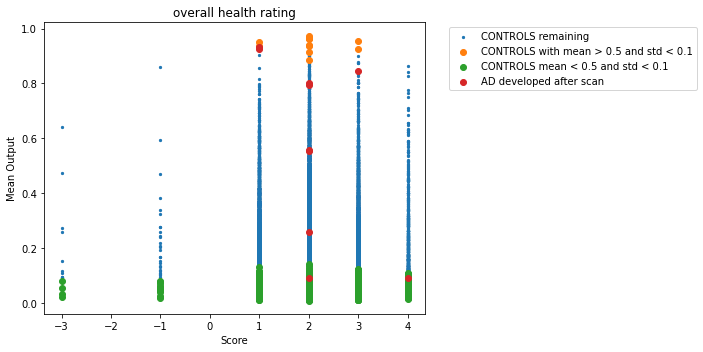

--------------------------------------------------------


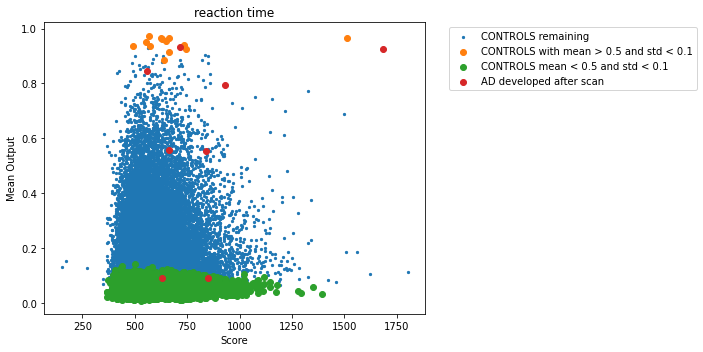

--------------------------------------------------------


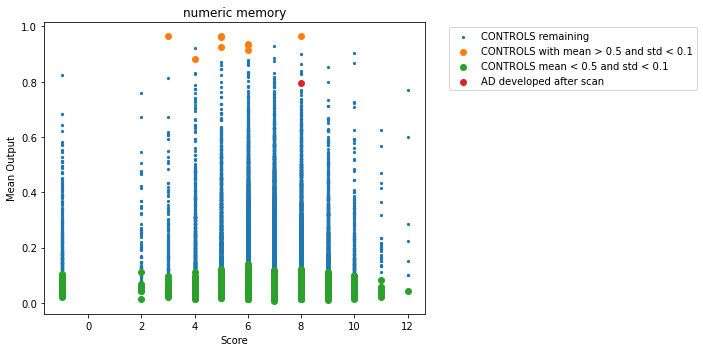

--------------------------------------------------------


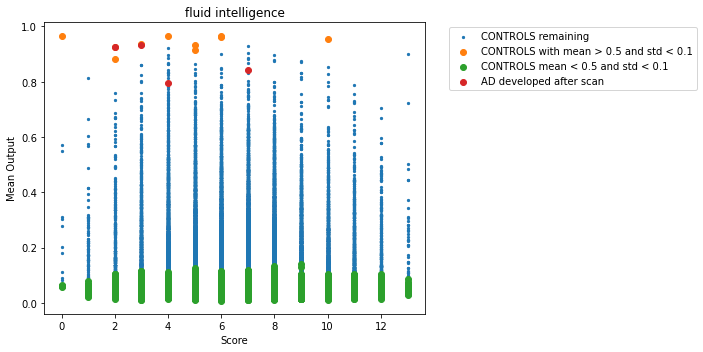

--------------------------------------------------------


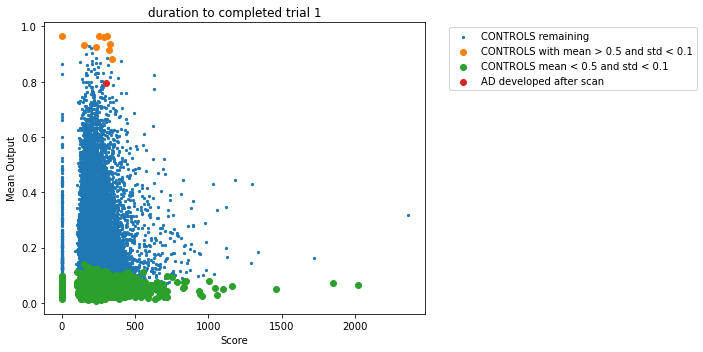

--------------------------------------------------------


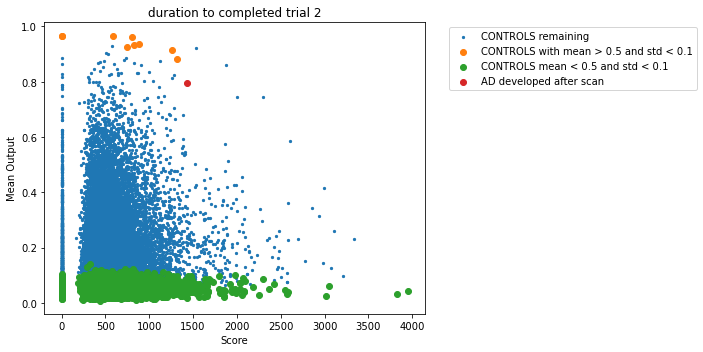

--------------------------------------------------------


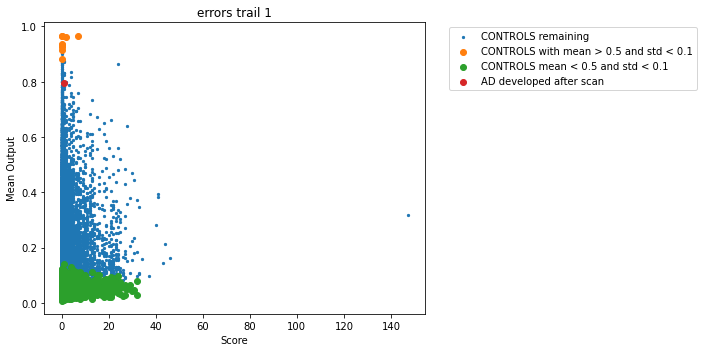

--------------------------------------------------------


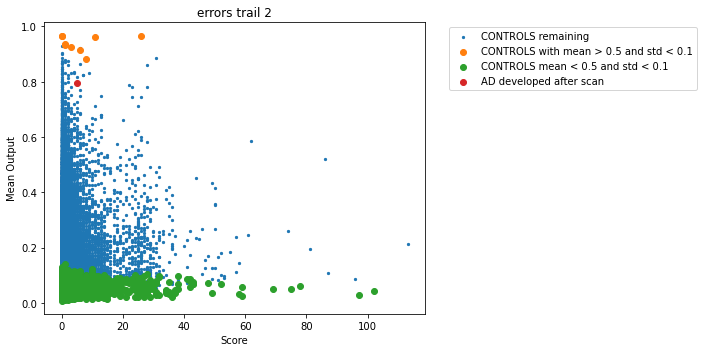

--------------------------------------------------------


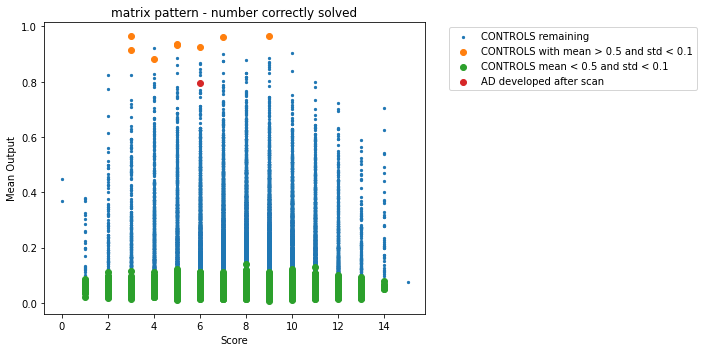

--------------------------------------------------------


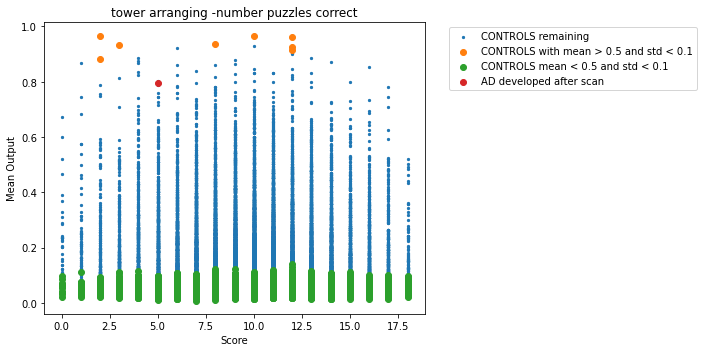

--------------------------------------------------------


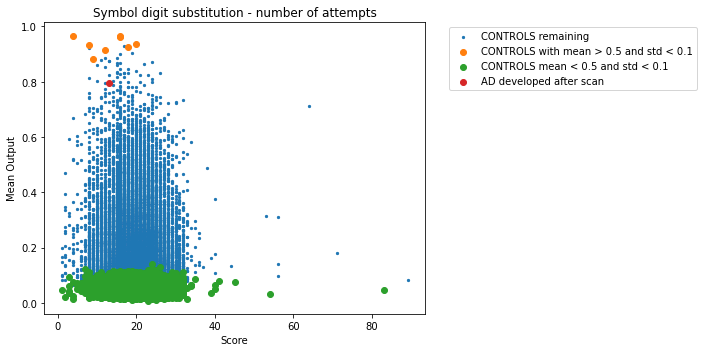

--------------------------------------------------------


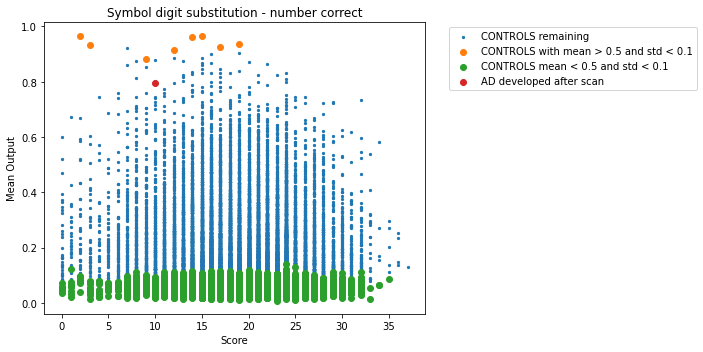

--------------------------------------------------------


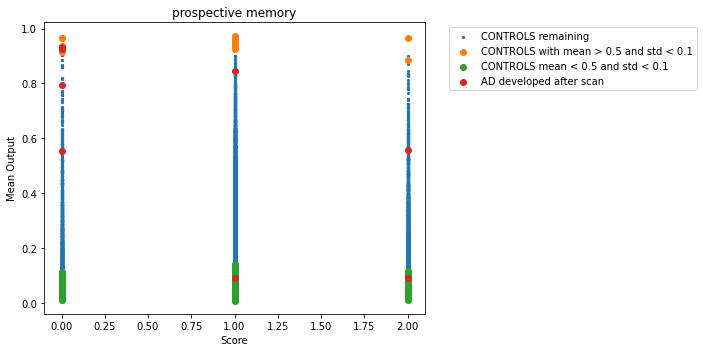

--------------------------------------------------------


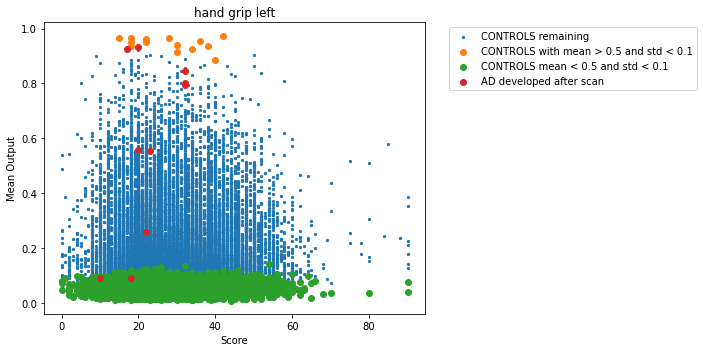

--------------------------------------------------------


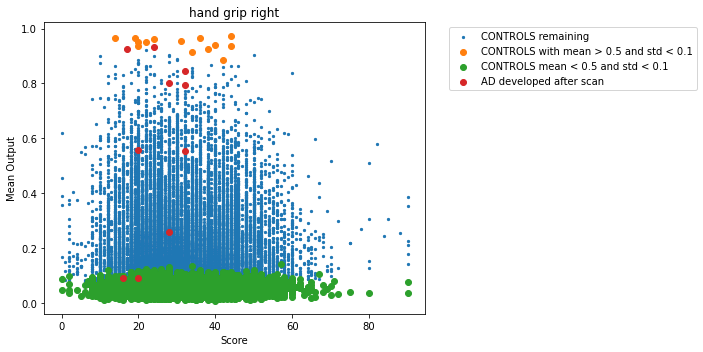

--------------------------------------------------------


In [35]:
dfs_to_plot = [
    (other_controls, 'CONTROLS remaining'),
    (certain_controls_predicted, 'CONTROLS with mean > 0.5 and std < 0.1'),
    (certain_controls, 'CONTROLS mean < 0.5 and std < 0.1'),
    (people_ad_later, 'AD developed after scan')
]


for col in ukb_phen.columns:
    plt.figure(figsize=(10, 5))
    for df, df_name in dfs_to_plot:
        df_tmp = df.join(ukb_phen)[['mean', col]].dropna()

        if df_name == 'CONTROLS remaining':
            plt.scatter(df_tmp[col], df_tmp['mean'], label=df_name, s=5)
        else:
            plt.scatter(df_tmp[col], df_tmp['mean'], label=df_name)

    plt.title(phenotype_mapping[col])
    plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xlabel('Score')
    plt.ylabel('Mean Output')
    plt.tight_layout()
    plt.show()
    plt.close()

    print('--------------------------------------------------------')